In [1]:
import h5py
from scipy import sparse
import numpy as np
import scanpy as sc
import anndata as ad
from tqdm import tqdm

In [ ]:
with h5py.File('per-protein.h5', 'r') as file:
    keys = list(file.keys())
    data_list = []

    names = []
    for key in tqdm(keys):
        data = file[key][:]
        if np.isnan(data).any():
            print(key)
        else:
            names.append(key)
            data_list.append(data)

    combined_data = np.vstack(data_list)

sparse_matrix = sparse.csr_matrix(combined_data)

  1%|          | 2968/570820 [00:00<01:17, 7344.02it/s]

A0A179H164


100%|██████████| 570820/570820 [01:21<00:00, 7014.33it/s]


In [14]:
import pickle
with open("prt_pca_umap.pkl", "rb") as f:
    adata = pickle.load(f)

In [150]:
xadata[xadata.obs['cid']=="UniRef50_P37869"].obs

,0,cid
8514,A1WWZ2,UniRef50_P37869
10530,A3DBQ5,UniRef50_P37869
12138,A4G737,UniRef50_P37869
15181,A5FN12,UniRef50_P37869
18142,A6SXG3,UniRef50_P37869
...,...,...
213262,Q8PLS0,UniRef50_P37869
214542,Q8RI55,UniRef50_P37869
243824,Q9PJF3,UniRef50_P37869
248363,Q9UAE6,UniRef50_P37869


In [36]:
adata.obs["cid"] = adata.obs[0].map({key: value for key, value in zip(id_map[0], id_map[2])})

In [38]:
adata.obs

,0,cid
0,A0A009IHW8,UniRef50_D0HCF6
1,A0A011QK89,UniRef50_G0ES38
2,A0A017SE81,UniRef50_G7XDK1
3,A0A017SE85,UniRef50_A0A017SE85
4,A0A017SEF3,UniRef50_A0A017SEF3
...,...,...
570814,X5LX76,UniRef50_Q18284
570815,X5M5N0,UniRef50_Q8I127
570816,X5M8U1,UniRef50_G0P6D8
570817,X6R8D5,UniRef50_X6R8D5


In [33]:
rr = adata[adata.obs[0].isin(pika)].obsp['distances'][0].toarray()[0]

In [100]:
xadata = adata[adata.obs[0].isin(pika)]
xadata.obs = xadata.obs.reset_index(drop=True, inplace=False)
xadata.obs

,0,cid
0,A0A009IHW8,UniRef50_D0HCF6
1,A0A011QK89,UniRef50_G0ES38
2,A0A017SE81,UniRef50_G7XDK1
3,A0A017SE85,UniRef50_A0A017SE85
4,A0A017SEF3,UniRef50_A0A017SEF3
...,...,...
257149,X5IY26,UniRef50_D2DGD4
257150,X5JA13,UniRef50_Q8RVQ5
257151,X5JB51,UniRef50_Q8RVQ5
257152,X5LX76,UniRef50_Q18284


In [93]:
adata.obsp['connectivities'][878].toarray()[0,867]

0.6041312

In [152]:
idx = 10530
rr = xadata.obsp['distances'][idx].toarray()[0]
print(rr)
print(np.argsort(rr))
closest_indices = np.argsort(rr)[-20:]
print(closest_indices)
# closest_indices_sorted = closest_indices[np.argsort(rr[closest_indices])]

s1 = pika[xadata.obs[0].iloc[idx]]['sequence']
s2s = [pika[xadata.obs[0].iloc[i]]['sequence'] for i in closest_indices if xadata.obs[0].iloc[i] in pika]
print(len(s2s))
for ss in s2s:
    print(rouge_score(s1, ss, tokenizer=list, rouge_keys="rougeL"))

[0. 0. 0. ... 0. 0. 0.]
[     0 171427 171428 ... 129135  20155  98202]
[ 85726  85710  85709  85712  85724  85723  85722  85721  85720  85719
  85711  85718  85716  85715  85714  85713  85717 129135  20155  98202]
20
{'rougeL_fmeasure': tensor(0.3671), 'rougeL_precision': tensor(0.3811), 'rougeL_recall': tensor(0.3541)}
{'rougeL_fmeasure': tensor(0.2895), 'rougeL_precision': tensor(0.6975), 'rougeL_recall': tensor(0.1827)}
{'rougeL_fmeasure': tensor(0.3653), 'rougeL_precision': tensor(0.4273), 'rougeL_recall': tensor(0.3190)}
{'rougeL_fmeasure': tensor(0.2147), 'rougeL_precision': tensor(0.1247), 'rougeL_recall': tensor(0.7714)}
{'rougeL_fmeasure': tensor(0.2416), 'rougeL_precision': tensor(0.1501), 'rougeL_recall': tensor(0.6190)}
{'rougeL_fmeasure': tensor(0.3529), 'rougeL_precision': tensor(0.3256), 'rougeL_recall': tensor(0.3852)}
{'rougeL_fmeasure': tensor(0.3638), 'rougeL_precision': tensor(0.3949), 'rougeL_recall': tensor(0.3373)}
{'rougeL_fmeasure': tensor(0.3366), 'rougeL_pre

{'rougeL_fmeasure': tensor(0.2835), 'rougeL_precision': tensor(0.6420), 'rougeL_recall': tensor(0.1819)}
{'rougeL_fmeasure': tensor(0.3117), 'rougeL_precision': tensor(0.5889), 'rougeL_recall': tensor(0.2120)}
{'rougeL_fmeasure': tensor(0.3669), 'rougeL_precision': tensor(0.4203), 'rougeL_recall': tensor(0.3256)}
{'rougeL_fmeasure': tensor(0.3634), 'rougeL_precision': tensor(0.2841), 'rougeL_recall': tensor(0.5041)}
{'rougeL_fmeasure': tensor(0.3600), 'rougeL_precision': tensor(0.3788), 'rougeL_recall': tensor(0.3431)}
{'rougeL_fmeasure': tensor(0.3328), 'rougeL_precision': tensor(0.2425), 'rougeL_recall': tensor(0.5303)}
{'rougeL_fmeasure': tensor(0.3592), 'rougeL_precision': tensor(0.3418), 'rougeL_recall': tensor(0.3785)}
{'rougeL_fmeasure': tensor(0.3844), 'rougeL_precision': tensor(0.3533), 'rougeL_recall': tensor(0.4215)}
{'rougeL_fmeasure': tensor(0.6767), 'rougeL_precision': tensor(0.6767), 'rougeL_recall': tensor(0.6767)}
{'rougeL_fmeasure': tensor(0.6690), 'rougeL_precision':

20
{'rougeL_fmeasure': tensor(1.), 'rougeL_precision': tensor(1.), 'rougeL_recall': tensor(1.)}
{'rougeL_fmeasure': tensor(0.3689), 'rougeL_precision': tensor(0.4758), 'rougeL_recall': tensor(0.3012)}
{'rougeL_fmeasure': tensor(0.3518), 'rougeL_precision': tensor(0.3903), 'rougeL_recall': tensor(0.3201)}
{'rougeL_fmeasure': tensor(0.3498), 'rougeL_precision': tensor(0.4610), 'rougeL_recall': tensor(0.2818)}
{'rougeL_fmeasure': tensor(0.3045), 'rougeL_precision': tensor(0.2156), 'rougeL_recall': tensor(0.5179)}
{'rougeL_fmeasure': tensor(0.2598), 'rougeL_precision': tensor(0.6914), 'rougeL_recall': tensor(0.1599)}
{'rougeL_fmeasure': tensor(0.2987), 'rougeL_precision': tensor(0.6357), 'rougeL_recall': tensor(0.1952)}
{'rougeL_fmeasure': tensor(0.3241), 'rougeL_precision': tensor(0.6320), 'rougeL_recall': tensor(0.2179)}
{'rougeL_fmeasure': tensor(0.3242), 'rougeL_precision': tensor(0.4164), 'rougeL_recall': tensor(0.2654)}
{'rougeL_fmeasure': tensor(0.2857), 'rougeL_precision': tensor(0

{'rougeL_fmeasure': tensor(0.3310), 'rougeL_precision': tensor(0.2639), 'rougeL_recall': tensor(0.4437)}
{'rougeL_fmeasure': tensor(0.3453), 'rougeL_precision': tensor(0.4833), 'rougeL_recall': tensor(0.2686)}
{'rougeL_fmeasure': tensor(0.3713), 'rougeL_precision': tensor(0.4238), 'rougeL_recall': tensor(0.3304)}
{'rougeL_fmeasure': tensor(0.3726), 'rougeL_precision': tensor(0.4349), 'rougeL_recall': tensor(0.3259)}
{'rougeL_fmeasure': tensor(0.3258), 'rougeL_precision': tensor(0.2937), 'rougeL_recall': tensor(0.3657)}
{'rougeL_fmeasure': tensor(0.3493), 'rougeL_precision': tensor(0.4461), 'rougeL_recall': tensor(0.2871)}
{'rougeL_fmeasure': tensor(0.3628), 'rougeL_precision': tensor(0.2974), 'rougeL_recall': tensor(0.4651)}
{'rougeL_fmeasure': tensor(0.3132), 'rougeL_precision': tensor(0.2119), 'rougeL_recall': tensor(0.6000)}


In [2]:
import pandas as pd
id_map = pd.read_csv('id_maps.tsv', sep="\t", header=None)

import pickle

with open("uniref50_gpt_data.pkl", "rb") as f:
    pika = pickle.load(f)

In [3]:
fid_map = id_map[id_map[2].isin(id_map[id_map[0].isin(pika)][2].value_counts()[:5].index.to_numpy())]
fid_map[fid_map[0].isin(pika)]

,0,1,2
48778,P0DH95,UniRef50,UniRef50_O16305
48781,P62200,UniRef50,UniRef50_O16305
48785,P13868,UniRef50,UniRef50_O16305
48787,Q9XZP2,UniRef50,UniRef50_O16305
48788,Q9UB37,UniRef50,UniRef50_O16305
...,...,...,...
349812,A1WK97,UniRef50,UniRef50_Q6N4V2
349818,Q5E895,UniRef50,UniRef50_Q6N4V2
349830,Q8PNQ9,UniRef50,UniRef50_Q6N4V2
557848,B2DEV1,UniRef50,UniRef50_D3DKC4


In [4]:
from torchmetrics.functional.text.rouge import rouge_score
sames, nosames = {}, {}
for _, r in tqdm(fid_map[fid_map[0].isin(pika)].iterrows()):
    uid, _, cid = r
    for _, _r in fid_map[fid_map[0].isin(pika)].iterrows():
        uid2, _, cid2 = _r
        n = tuple(set([uid, uid2]))
        if cid == cid2:
            if n not in sames:
                sames[n] = {k: v for k, v in rouge_score(pika[uid]["sequence"], pika[uid2]["sequence"], tokenizer=list, rouge_keys=("rougeL", "rougeLsum")).items() if "_fmeasure" in k}
        else:
            if n not in nosames:
                nosames[n] = {k: v for k, v in rouge_score(pika[uid]["sequence"], pika[uid2]["sequence"], tokenizer=list, rouge_keys=("rougeL", "rougeLsum")).items() if "_fmeasure" in k}

/opt/pyenv/versions/3.10.12/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
303it [1:12:08, 14.28s/it]


In [9]:
S1 = [v['rougeL_fmeasure'] for v in sames.values()]
N1 = [v['rougeL_fmeasure'] for v in nosames.values()]
S2 = [v['rougeLsum_fmeasure'] for v in sames.values()]
N2 = [v['rougeLsum_fmeasure'] for v in nosames.values()]

<AxesSubplot: xlabel='Group', ylabel='Value'>

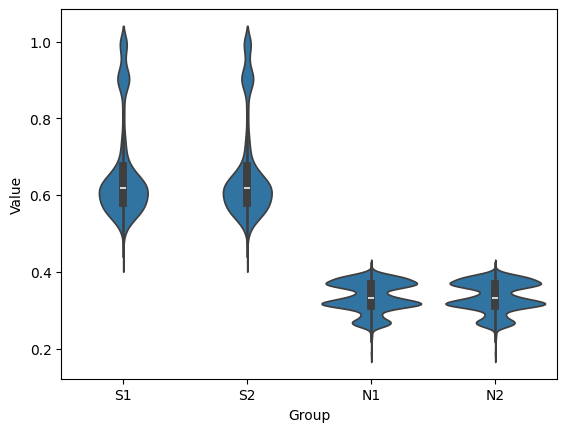

In [12]:
import seaborn as sns
import numpy as np

data = pd.DataFrame({
    'Value': np.concatenate([S1, S2, N1, N2]),
    'Group': ['S1']*len(S1) + ['S2']*len(S2) + ['N1']*len(N1) + ['N2']*len(N2)
})

# Create a violin plot
sns.violinplot(x='Group', y='Value', data=data)

In [13]:
len(pika)

257167

In [4]:
yy = (id_map[2].value_counts().cumsum() / 562504).to_numpy()
xx = np.array([i / len(yy) for i in range(len(yy))])
xx.shape, yy.shape

((163639,), (163639,))

In [10]:
id_map[id_map[0].isin(pika)][2].value_counts().cumsum()

2
UniRef50_D3DKC4        75
UniRef50_P37869       145
UniRef50_O16305       201
UniRef50_Q6N4V2       252
UniRef50_O66962       303
                    ...  
UniRef50_A6LDT9    252824
UniRef50_B1ZWP5    252825
UniRef50_Q2GD53    252826
UniRef50_B2A470    252827
UniRef50_A5WVY2    252828
Name: count, Length: 145716, dtype: int64

In [12]:
yy2 = (id_map[id_map[0].isin(pika)][2].value_counts().cumsum() / 252828).to_numpy()
xx2 = np.array([i / len(yy2) for i in range(len(yy2))])
xx2.shape, yy2.shape

((145716,), (145716,))

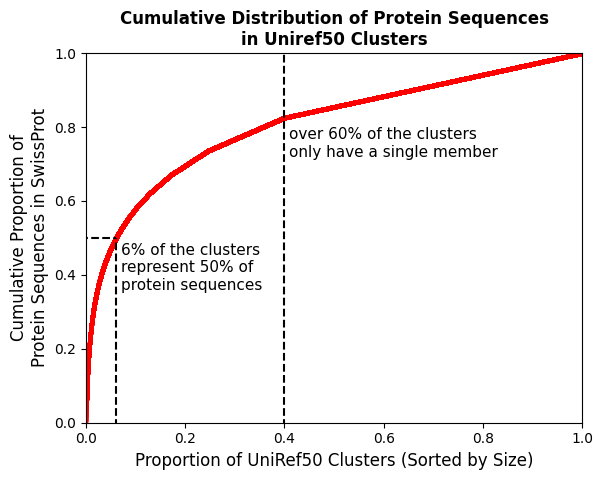

In [14]:
import matplotlib.pyplot as plt

plt.scatter(xx, yy, marker = ',', s = 1, c='r')
# plt.scatter(xx2, yy2, marker = ',', s = 1, c='g')
plt.hlines(0.5, -0.1, 0.06, colors='k', linestyles='dashed')
plt.vlines(0.4, -0.1, 1, colors='k', linestyles='dashed')
plt.vlines(0.06, -0.1, 0.5, colors='k', linestyles='dashed')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("Proportion of UniRef50 Clusters (Sorted by Size)", fontsize=12)
plt.ylabel("Cumulative Proportion of\nProtein Sequences in SwissProt", fontsize=12)
plt.title("Cumulative Distribution of Protein Sequences\nin Uniref50 Clusters", fontweight='bold')
plt.text(x=0.41, y=0.72, s="over 60% of the clusters\nonly have a single member", fontsize=11)
plt.text(x=0.07, y=0.36, s="6% of the clusters\nrepresent 50% of\nprotein sequences", fontsize=11)
plt.savefig("uniref50_clusters.png")


In [47]:
sum(id_map[2].value_counts().cumsum() < 281252)

9860

In [4]:
len(id_map[2].value_counts())

163639

In [5]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Choose a ListedColormap
cmap = plt.cm.get_cmap('Set2')

# Get colors from the colormap
colors = cmap.colors

# Adjust alpha value to 50%
colors_with_alpha = [(r, g, b, 0.5) for r, g, b in colors]

# Using these colors for plotting
# Example: plt.scatter(x, y, color=colors_with_alpha[i])


In [4]:
adata = ad.AnnData(X=sparse_matrix, obs=names)

In [43]:
import matplotlib.pyplot as plt

In [6]:
top100_df = id_map[id_map[2].isin(id_map[2].value_counts().iloc[:100].index.to_list())]
top100_map = {key: value for key, value in zip(top100_df[0], top100_df[2])}
adata.obs["clusters"] = adata.obs[0].map(top100_map)

In [31]:
sorted_obs = adata.obs.sample(n=257154)
sorted_obs = sorted_obs.sort_values('clusters', na_position='first')
adataS = adata[sorted_obs.index]
adataS.obs

,0,clusters,clustersp
175558,C6A452,NaN,NaN
66712,A7WWN1,NaN,NaN
206521,O89038,NaN,NaN
238010,P17883,NaN,NaN
86039,A9WA95,NaN,NaN
...,...,...,...
291596,P84674,UniRef50_Q90249,NaN
228677,P0DJP5,UniRef50_Q90249,NaN
199259,O57385,UniRef50_Q90249,NaN
442609,Q6EER4,UniRef50_Q90249,NaN


/opt/pyenv/versions/3.10.12/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


/opt/pyenv/versions/3.10.12/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


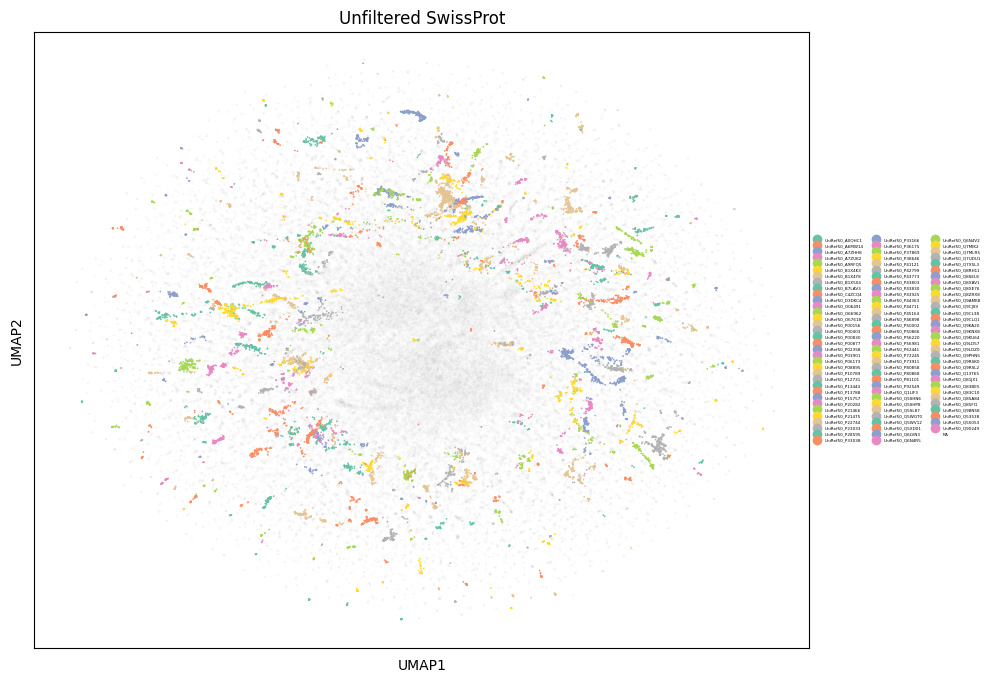

In [52]:
with plt.rc_context({'figure.figsize':(10, 8)}):
    sc.pl.umap(adataS, color="clusters", size=6, palette=colors_with_alpha, legend_fontsize=3, edges=False, na_color = (0.8, 0.8, 0.8, 0.02), title="Unfiltered SwissProt", save="_swiss_100_large_50pc.png")

In [8]:
import pickle

with open("uniref50_gpt_data.pkl", "rb") as f:
    pika = pickle.load(f)

In [37]:
top100p_map = {key: value for key, value in zip(top100_df[0], top100_df[2]) if key in pika}
adataS.obs["clustersp"] = adataS.obs[0].map(top100p_map)

In [38]:
sorted_obs = adataS.obs.sort_values('clustersp', na_position='first')
adataS = adataS[sorted_obs.index]
adataS.obs
# sc.pl.umap(adata, color="clustersp", size=6, palette=colors_with_alpha, legend_fontsize=3, edges=False, na_color = (0.8, 0.8, 0.8, 0.02), title="Filtered SwissProt (Pika-DS)", save="pika_100_all.png")

,0,clusters,clustersp
175558,C6A452,NaN,NaN
66712,A7WWN1,NaN,NaN
206521,O89038,NaN,NaN
238010,P17883,NaN,NaN
86039,A9WA95,NaN,NaN
...,...,...,...
463223,Q7DDT0,UniRef50_Q9RSL2,UniRef50_Q9RSL2
75280,A8IAP8,UniRef50_Q9RSL2,UniRef50_Q9RSL2
114251,B3CT21,UniRef50_Q9RSL2,UniRef50_Q9RSL2
51808,A6KYH9,UniRef50_Q9RSL2,UniRef50_Q9RSL2


/opt/pyenv/versions/3.10.12/lib/python3.10/site-packages/scanpy/plotting/_utils.py:431: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/opt/pyenv/versions/3.10.12/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


/opt/pyenv/versions/3.10.12/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


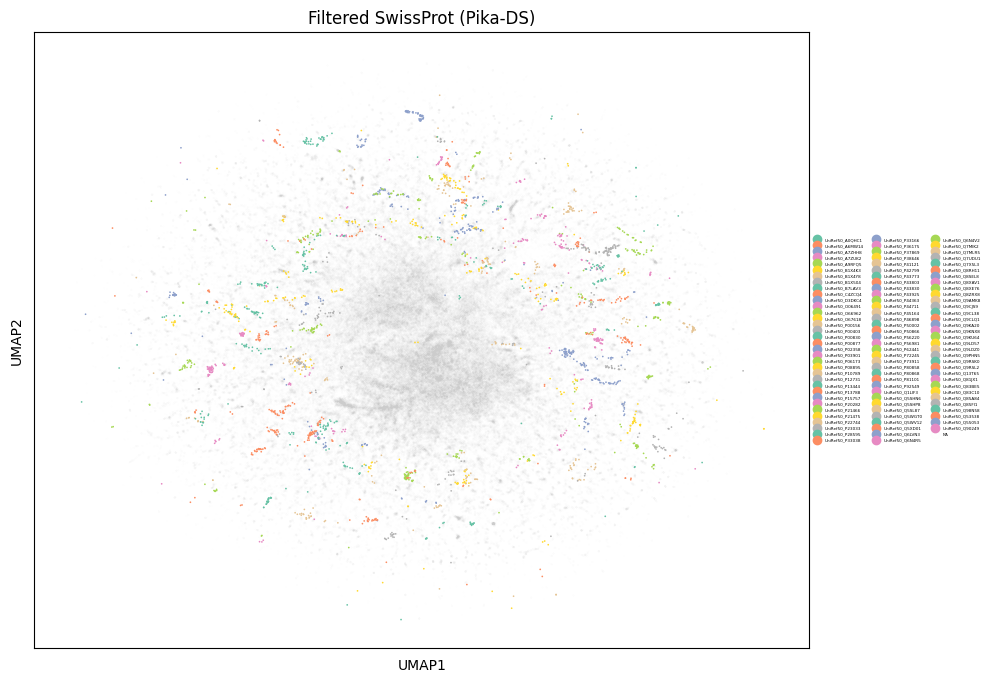

In [51]:
with plt.rc_context({'figure.figsize':(10, 8)}):
    sc.pl.umap(adata[adata.obs[0].isin(pika)], color="clustersp", size=6, palette=colors_with_alpha, legend_fontsize=3, edges=False, na_color = (0.8, 0.8, 0.8, 0.02), title="Filtered SwissProt (Pika-DS)", save="_pika_100_pika_large.png")

PCA
neighbour


/opt/pyenv/versions/3.10.12/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


UMAP


/opt/pyenv/versions/3.10.12/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


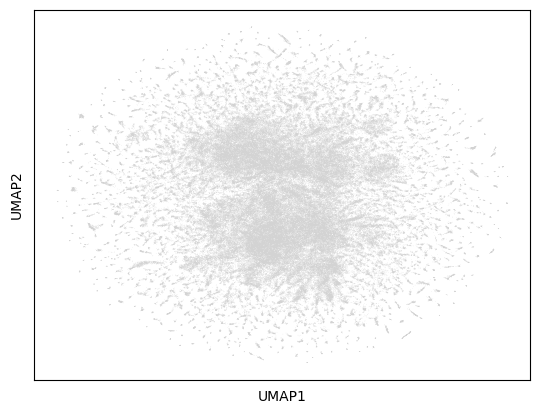

In [35]:
print("PCA")
sc.tl.pca(_adata)
print("neighbour")
sc.pp.neighbors(_adata)
print("UMAP")
sc.tl.umap(_adata)
sc.pl.umap(_adata)

/opt/pyenv/versions/3.10.12/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


/opt/pyenv/versions/3.10.12/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


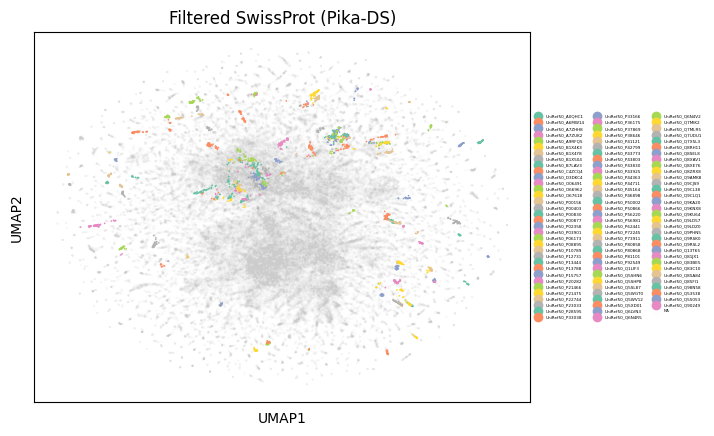

In [41]:
sc.pl.umap(_adata, color="clustersp", size=6, palette=colors_with_alpha, legend_fontsize=3, edges=False, na_color = (0.8, 0.8, 0.8, 0.02), title="Filtered SwissProt (Pika-DS)", save="pika_100_pika_reumap.png")

In [29]:
_adata

AnnData object with n_obs × n_vars = 257154 × 1024
    obs: 0, 'clusters', 'clustersp'
    uns: 'pca', 'neighbors', 'umap', 'clusters_colors', 'clustersp_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

/opt/pyenv/versions/3.10.12/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


/opt/pyenv/versions/3.10.12/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


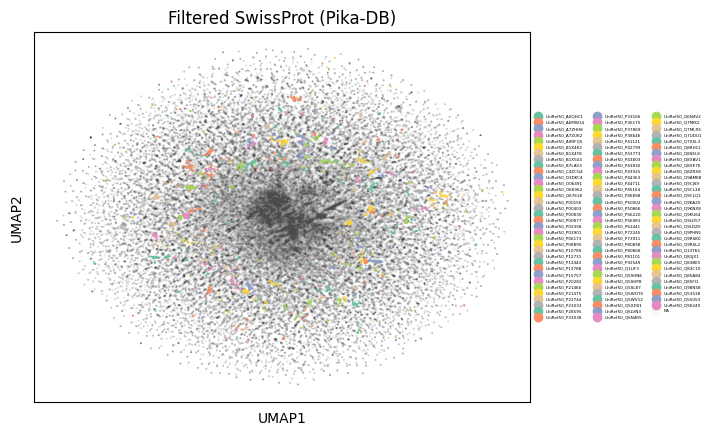

In [96]:
sc.pl.umap(_adata, color="clusters2", size=6, palette=colors_with_alpha, legend_fontsize=3, edges=False, na_color = (0.3, 0.3, 0.3, 0.02), title="Filtered SwissProt (Pika-DB)", save="pika_umap2.png")

/opt/pyenv/versions/3.10.12/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


/opt/pyenv/versions/3.10.12/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


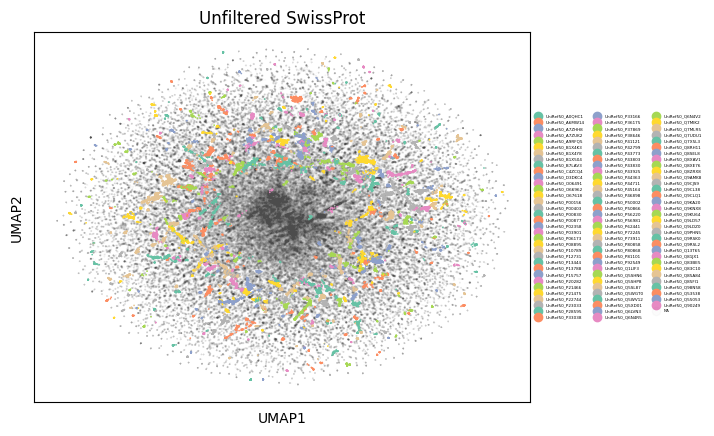

In [97]:
sc.pl.umap(_adata, color="clusters", size=6, palette=colors_with_alpha, legend_fontsize=3, edges=False, na_color = (0.3, 0.3, 0.3, 0.02), title="Unfiltered SwissProt", save="swiss_umap2.png")

In [70]:
adata.obsm["X_umap"]

array([[-0.5111441 ,  3.9714007 ],
       [-4.126113  ,  3.3639874 ],
       [-2.982751  ,  1.2549609 ],
       ...,
       [ 0.60098827, -1.6182384 ],
       [ 3.752446  ,  1.202043  ],
       [ 3.4117417 , -0.81503636]], dtype=float32)

In [68]:
adata

AnnData object with n_obs × n_vars = 570819 × 1024
    obs: 0, 'clusters'
    uns: 'pca', 'neighbors', 'umap', 'clusters_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

PCA
neighbour


/opt/pyenv/versions/3.10.12/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


UMAP


/opt/pyenv/versions/3.10.12/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


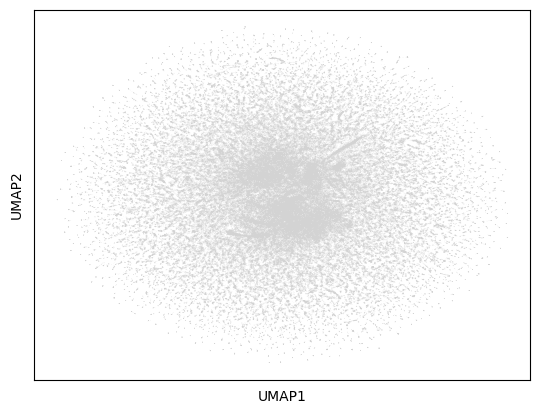

In [6]:
# print("PCA")
# sc.tl.pca(adata)
layer = "X"
print("neighbour")
sc.pp.neighbors(_adata, use_rep=layer)
print("UMAP")
sc.tl.umap(_adata)
sc.pl.umap(_adata)

neighbour
UMAP


/opt/pyenv/versions/3.10.12/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


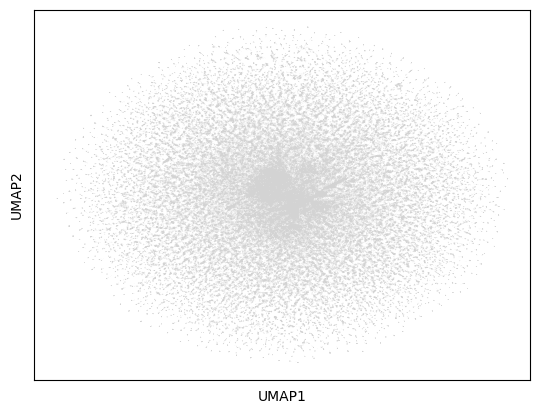

In [12]:
layer = "X"
print("neighbour")
sc.pp.neighbors(_adata, use_rep=layer)
print("UMAP")
sc.tl.umap(_adata)
sc.pl.umap(_adata)

In [ ]:
x[()]